In [2]:
# Dependencies
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colormaps as cmaps
from matplotlib.colors import ListedColormap as lcmap
from matplotlib.colors import Normalize as norm
from matplotlib.colors import LogNorm as logn
import matplotlib.animation as animation

In [24]:
# dates in dataset to look at
dt = [f'{str(x.date())}' for x in pd.date_range("2013-01-01", "2024-02-29", freq="D")]
# set custom colomap
afmhot = cmaps['afmhot']
afmhot2 = lcmap(afmhot(np.linspace(0.1, 0.7, 256)))

In [9]:
df = pd.read_csv(f'../outputs/nasa-firms/all.csv')
df.loc[:,'cnt']=1

In [19]:
df1 = df[['acq_date','cnt','frp','bright_ti4','bright_ti5']]

In [40]:
df2 = df1.groupby('acq_date').sum()
id = [x for x in df2.index if x in dt]
ad = [x for x in dt if x not in df2.index]
df2 = df2.loc[id]

In [41]:
ad

['2013-01-24',
 '2016-01-04',
 '2016-01-10',
 '2017-01-02',
 '2017-01-09',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-02-20',
 '2018-01-08',
 '2019-01-05',
 '2019-01-15',
 '2019-02-13',
 '2019-02-14',
 '2020-01-20',
 '2021-12-23',
 '2022-07-27',
 '2022-07-28',
 '2022-07-29',
 '2022-07-30',
 '2022-07-31',
 '2022-08-01',
 '2022-08-02',
 '2022-08-03',
 '2022-08-04',
 '2022-08-05',
 '2022-08-06',
 '2022-08-07',
 '2022-08-08',
 '2022-08-09',
 '2022-08-10',
 '2023-01-10',
 '2023-01-15',
 '2023-02-25',
 '2023-03-19',
 '2023-07-26',
 '2024-01-20',
 '2024-01-22']

In [97]:
df1.loc[141,'2013-05'] = None
df2.loc[141,'2013-05'] = None

In [153]:
df1.min(axis=None),df1.max(axis=None)

(0.07, 52558.2)

In [160]:
df1.columns[0:-5] #201301-202402

Index(['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10',
       ...
       '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10',
       '2023-11', '2023-12', '2024-01', '2024-02'],
      dtype='object', length=134)

In [99]:
df3 = df1*df2
df4 = df1/df2

In [144]:
d5 = pd.Series(dict(zip(df1.columns, [df2.loc[:,i].dropna().count() for i in df1.columns]))) #0.1 grid count
df5 = df1/d5

In [139]:
d6 = pd.Series(dict(zip(df1.columns, [df2.loc[:,i].dropna().sum().astype('int') for i in df1.columns]))) # 375m grid count
df6 = df1/d6

In [124]:
boxprops = dict(linestyle='-', linewidth=0.5, color='#999', facecolor="#eee")
flierprops = dict(marker='o', markerfacecolor='#999', markersize=3, markeredgecolor='none', alpha=0.4)
medianprops = dict(linestyle='-', linewidth=2.5, color='#fc7d00')
meanprops = dict(marker='D', markeredgecolor='none',markerfacecolor='#ffa425')
capprops = dict(color="#666", linewidth = 2.5)

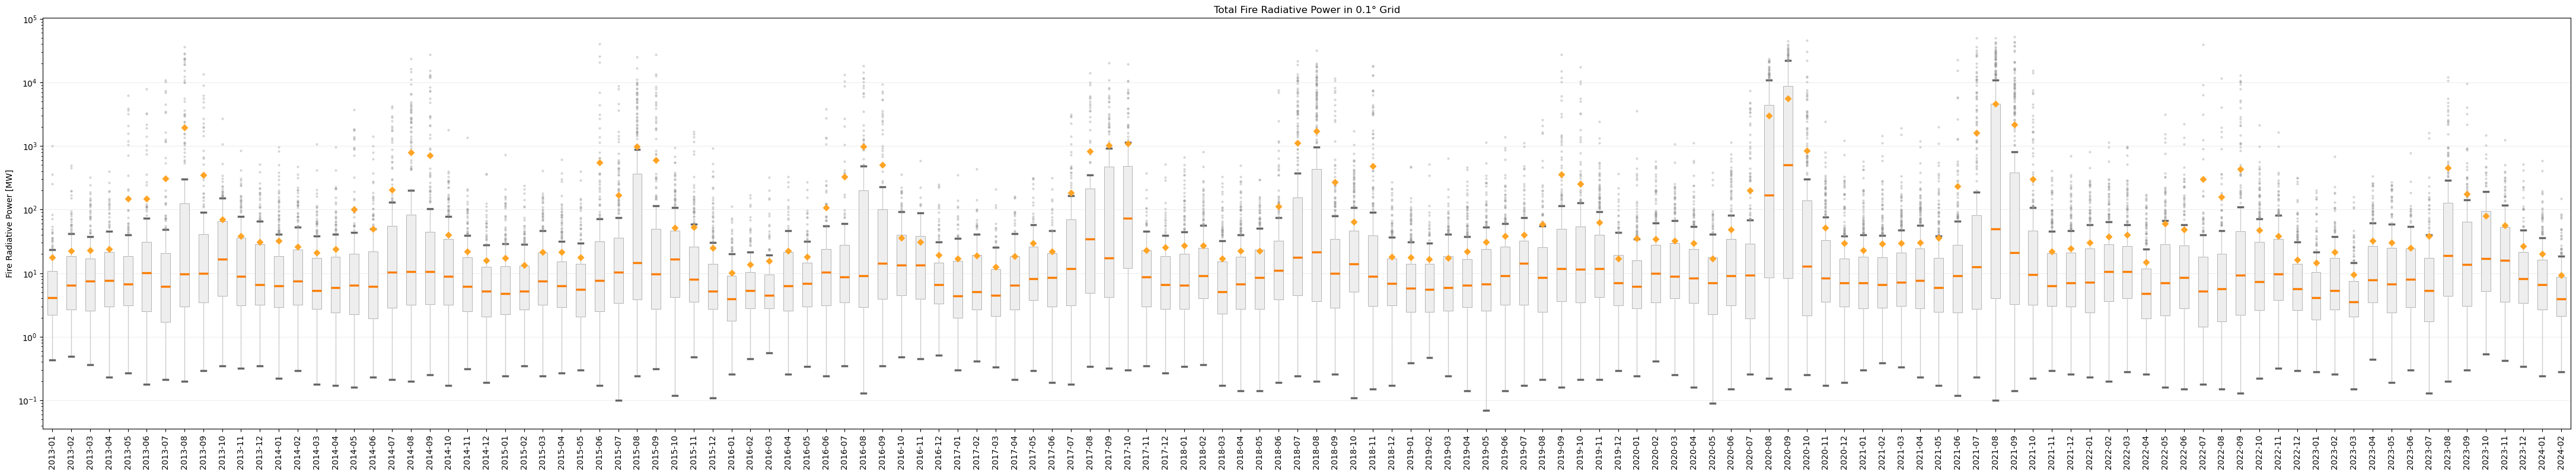

In [161]:
df1[df1.columns[0:-5]].boxplot(ylabel='Fire Radiative Power [MW]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.title('Total Fire Radiative Power in 0.1° Grid')
plt.xticks(rotation='vertical')
# plt.ylim([0.03,300000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/frp_boxplot.png')
plt.show()

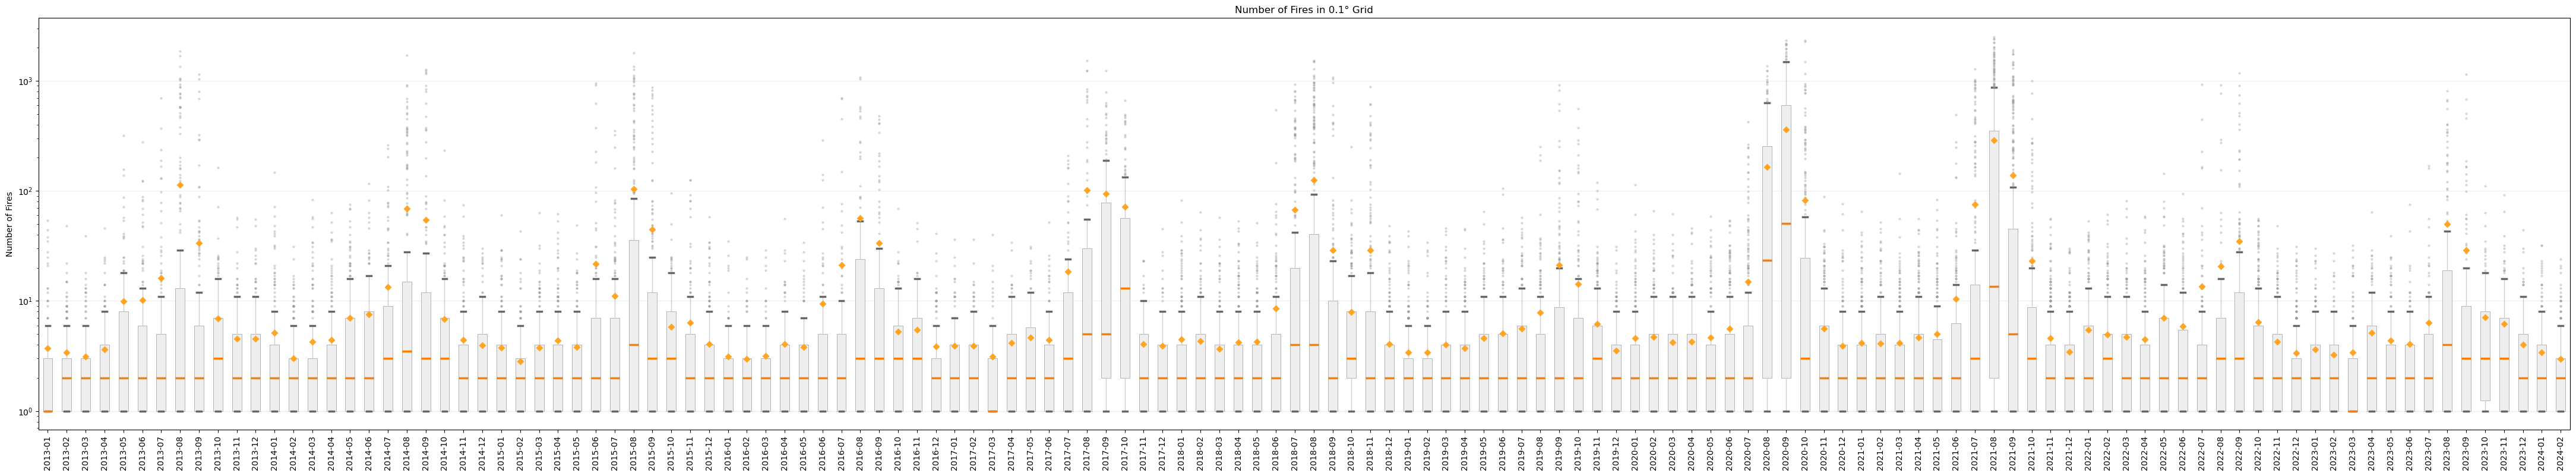

In [162]:
df2[df1.columns[0:-5]].boxplot(ylabel='Number of Fires', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.title('Number of Fires in 0.1° Grid')
plt.xticks(rotation='vertical')
# plt.ylim([0.5,5000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/cnt_boxplot.png')
plt.show()

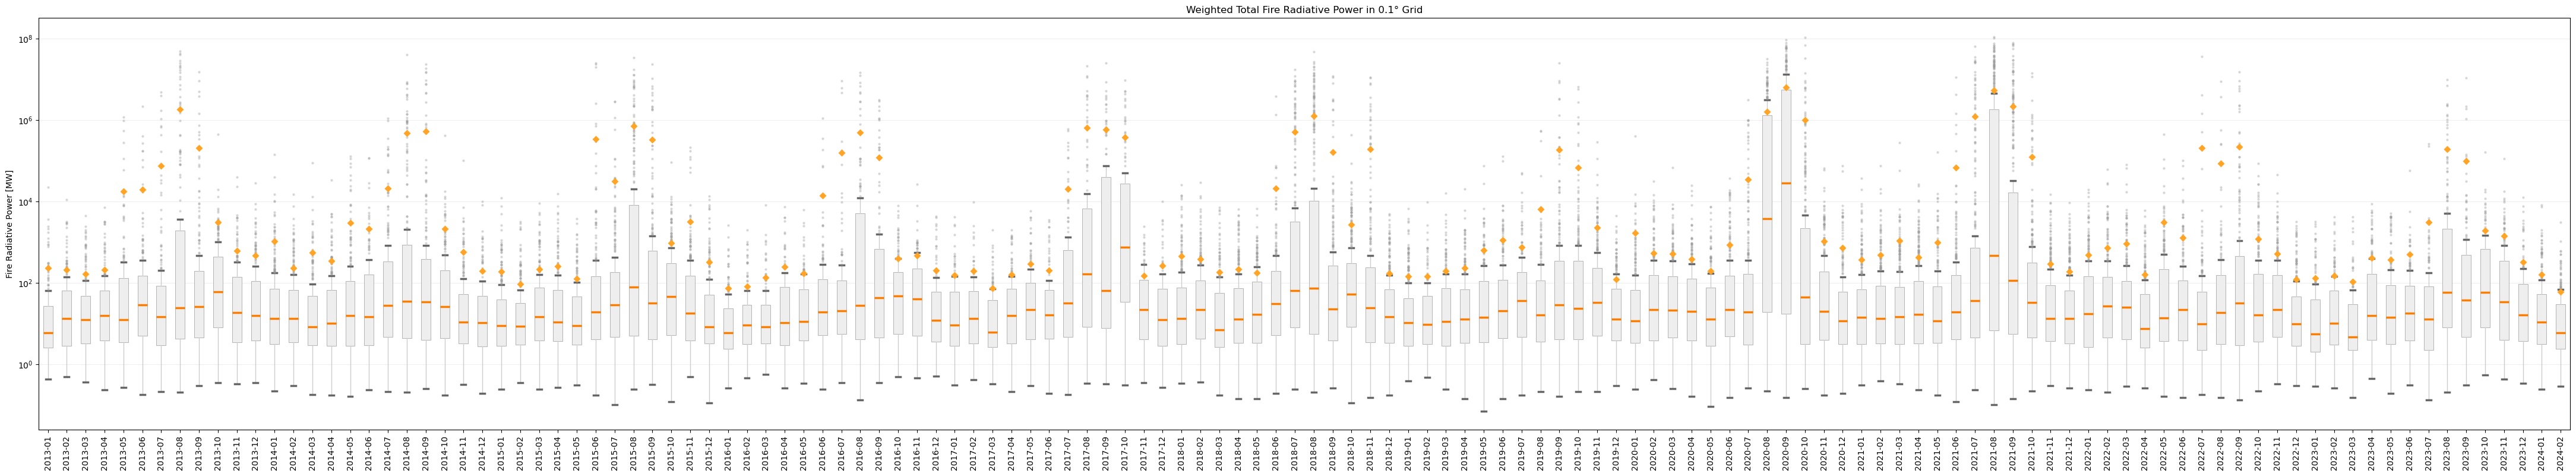

In [163]:
df3[df1.columns[0:-5]].boxplot(ylabel='Fire Radiative Power [MW]',
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.title('Weighted Total Fire Radiative Power in 0.1° Grid')
plt.xticks(rotation='vertical')
# plt.ylim([0.03,500000000])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/exp_boxplot.png')
plt.show()

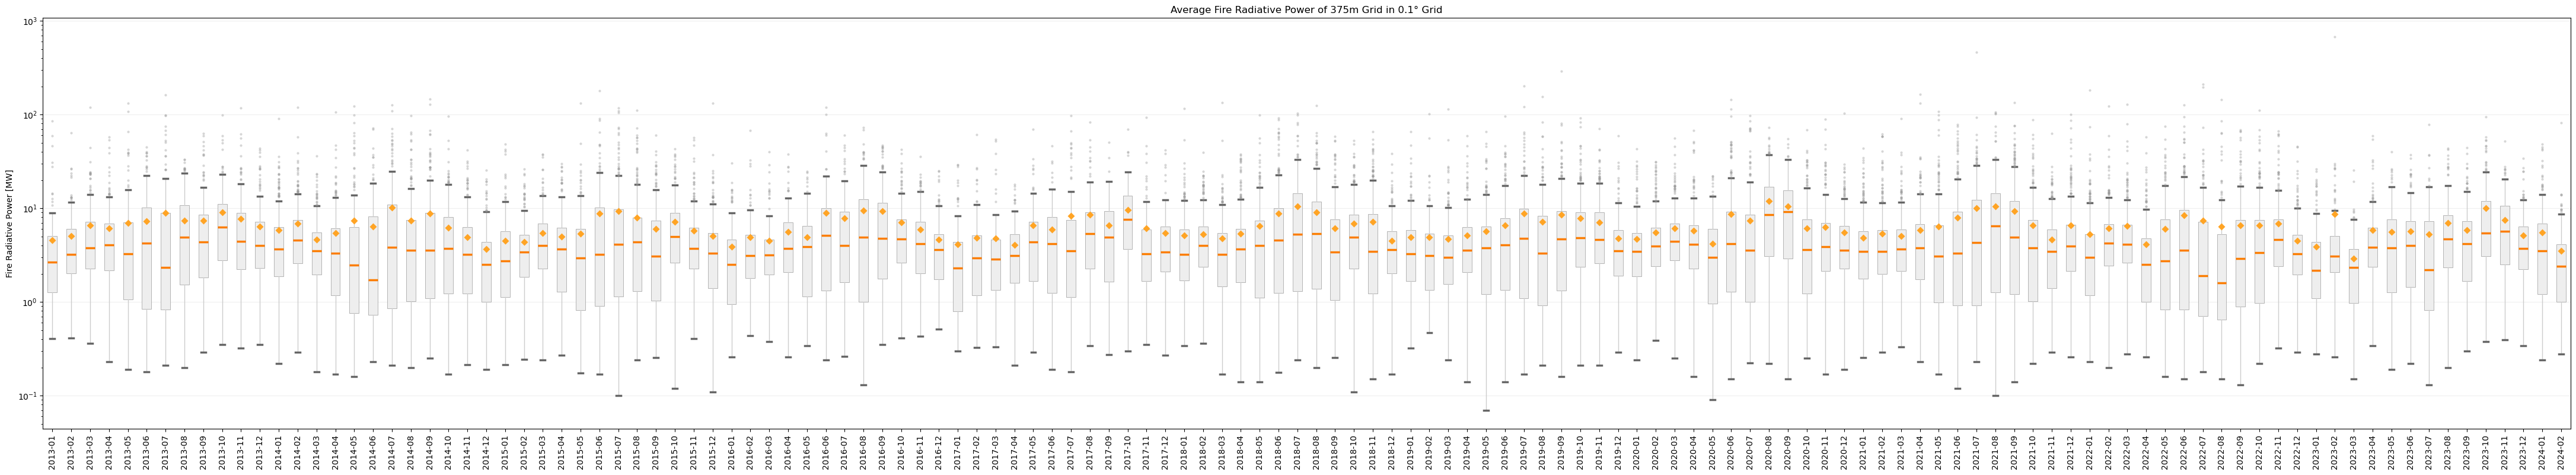

In [165]:
df4[df1.columns[0:-5]].boxplot(ylabel='Fire Radiative Power [MW]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.title('Average Fire Radiative Power of 375m Grid in 0.1° Grid')
plt.xticks(rotation='vertical')
# plt.ylim([0.05,500])
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/com_boxplot.png')
plt.show()

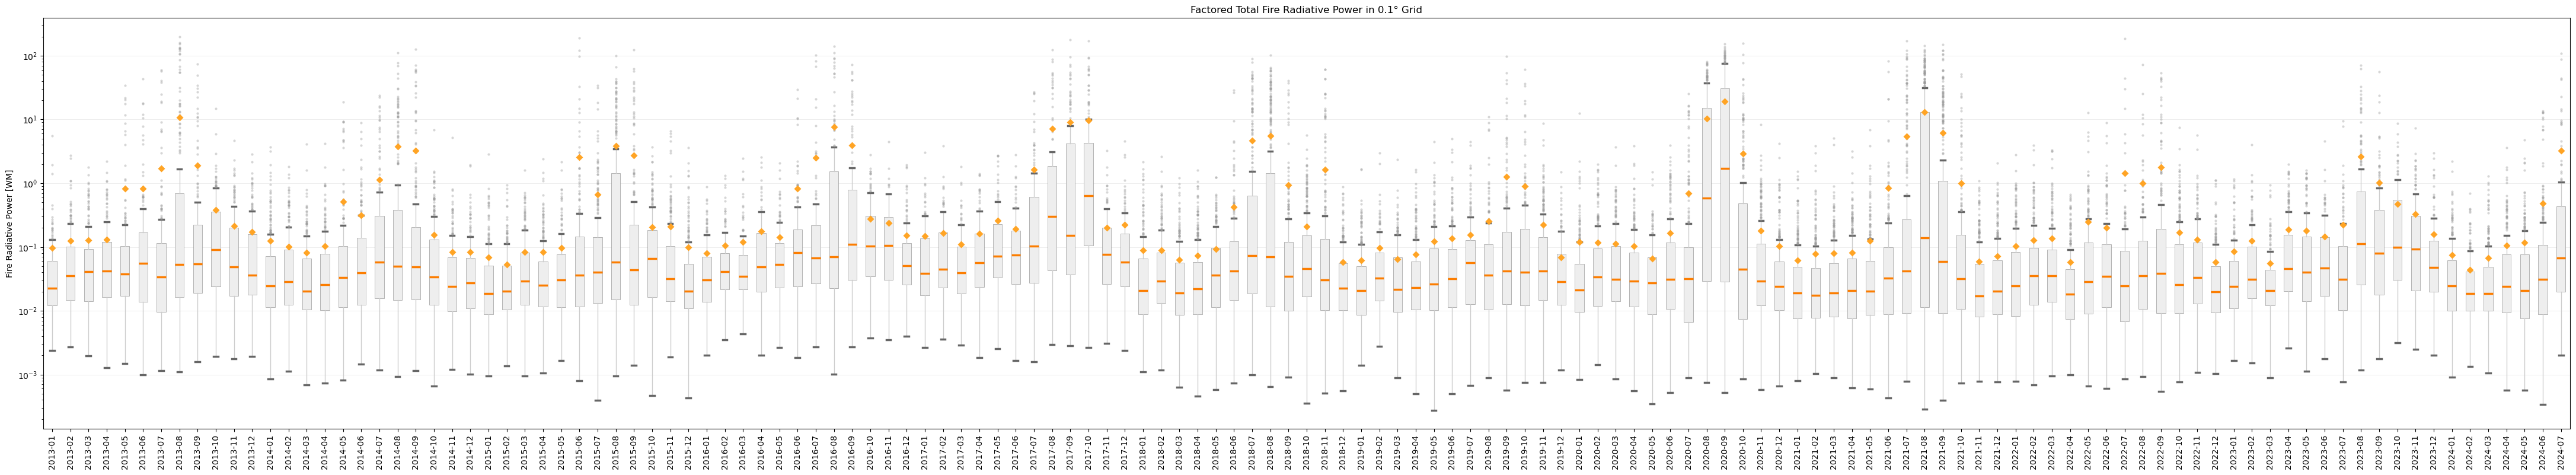

In [150]:
df5[df1.columns[0:-5]].boxplot(ylabel='Fire Radiative Power [WM]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.title('Factored Total Fire Radiative Power in 0.1° Grid')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
# plt.savefig(f'../outputs/nasa-firms/images/avg_boxplot.png')
plt.show()

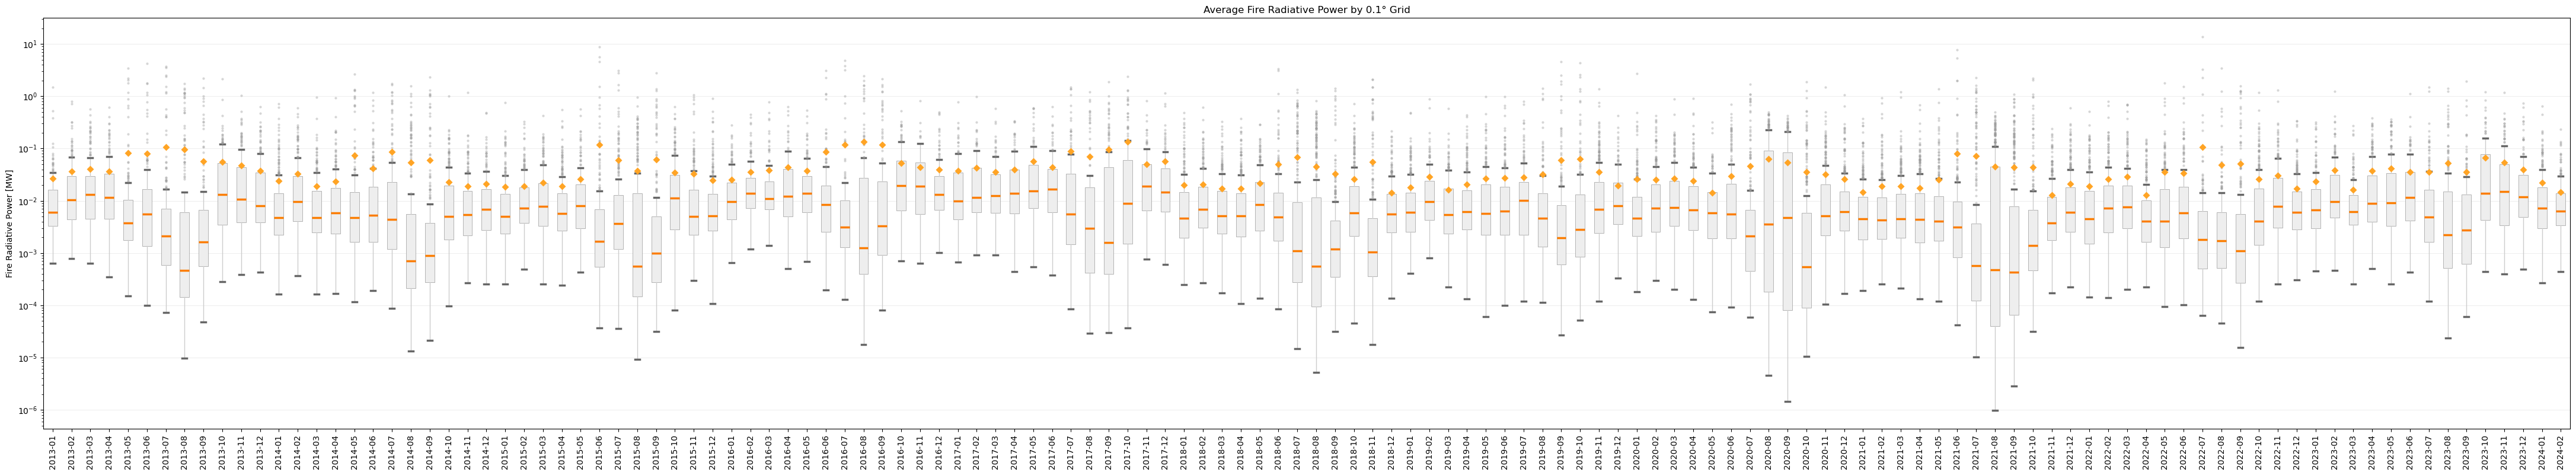

In [166]:
df6[df1.columns[0:-5]].boxplot(ylabel='Fire Radiative Power [MW]', 
            figsize=(55,9), grid=False, showmeans = True, patch_artist=True,
            color = dict(whiskers='#ccc'), boxprops=boxprops, flierprops=flierprops, 
            medianprops=medianprops, capprops=capprops, meanprops=meanprops)
plt.title('Average Fire Radiative Power by 0.1° Grid')
plt.xticks(rotation='vertical')
plt.grid(axis='y',color='#eee')
plt.yscale("log")
plt.savefig(f'../outputs/nasa-firms/images/avg_boxplot.png')
plt.show()

In [169]:
pd.DataFrame(df1.sum()).plot()

<Axes: >